# Analisi Diffusione COVID-19
Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce "Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

##1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
# Importo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Importo il dataset e lo definisco come DataFrame
df_covid = pd.read_csv("/content/drive/MyDrive/EPICODE/M4_PYTHON/Prova_FInale/owid-covid-data.csv")

# Avvio l'EDA
# Stampo le prime e le ultime 5 righe
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [73]:
#EDA - Verifico le dimensioni e i metadati
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

Il dataset contiene 429435 righe e 67 colonne

In [74]:
#EDA - Converto in datetime la colonna date
df_covid['date'] = pd.to_datetime(df_covid['date'])
display(df_covid['date'])
print("\n")
df_covid.info() #verifico l'effettiva trasformazione in datetime

,date
0,2020-01-05
1,2020-01-06
2,2020-01-07
3,2020-01-08
4,2020-01-09
...,...
429430,2024-07-31
429431,2024-08-01
429432,2024-08-02
429433,2024-08-03




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64    

In [75]:
#Tramite requests posso recuperare i metadati dalla fonte in github usando un ciclo for
import requests

try:
    dataset_readme = requests.get('https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/README.md').text
except:
    dataset_readme = meta_info = ''

print("METADATI:")
for meta in sorted(df_covid.columns.values):
    if dataset_readme:
        meta_info = dataset_readme[dataset_readme.index(f'{meta}'):]
        meta_info = meta_info[meta_info.index('|') + 1:]
        meta_info = ' -->' + meta_info[:meta_info.index('|') - 1]

    print('-'*len(meta))
    print(f'{meta}{meta_info}')

METADATI:
-------------
aged_65_older --> Share of the population that is 65 years and older, most recent year available                                                                                                                                                            
-------------
aged_70_older --> Share of the population that is 70 years and older in 2015                                                                                                                                                                                
---------------------
cardiovasc_death_rate --> Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)                                                                                                                                               
---------
continent -->
----
date --> [XLSX](https://covid.ourworldindata.org/data/owid-covid-data.xlsx)
-------------------
diabetes_prevalence --> Diabetes prevalence (% o

In [76]:
# Analizzo i descrittori statistici di base per le colonne numeriche

# Seleziono solo le colonne numeriche
colonne_numeriche = df_covid.select_dtypes(include=['float64', 'int64']).columns

# Ne Calcolo i descrittori
df_covid_describe = df_covid[colonne_numeriche].describe().transpose().astype(float)#La trasposizione è utile per la visualizzazione data dal ciclo for successivo

for col in df_covid_describe.index: #Con questo ciclo for è possibile stampare i descrittori statistici e i valori nulli di ogni colonna
  n_null = df_covid[col].isnull().sum() #Calcolo valori nulli
  perc_null = df_covid[col].isnull().mean() * 100 #Calcolo percentuale nulli
  print(f"Statistiche per la colonna:\n'{col}'")
  df_covid_describe.loc[col, 'valori nulli'] = n_null #aggiungo i valori nulli e la loro percentuale ai df
  df_covid_describe.loc[col, '% valori nulli'] = perc_null
  display(df_covid_describe.loc[[col]].transpose())  # il doppio [[]] mantiene il DataFrame
  print()


Statistiche per la colonna:
'total_cases'


,total_cases
count,4.118040e+05
mean,7.365292e+06
std,4.477582e+07
min,0.000000e+00
25%,6.280750e+03
50%,6.365300e+04
75%,7.582720e+05
max,7.758668e+08
valori nulli,1.763100e+04
% valori nulli,4.105627e+00



Statistiche per la colonna:
'new_cases'


,new_cases
count,4.101590e+05
mean,8.017360e+03
std,2.296649e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.423623e+07
valori nulli,1.927600e+04
% valori nulli,4.488689e+00



Statistiche per la colonna:
'new_cases_smoothed'


,new_cases_smoothed
count,4.089290e+05
mean,8.041026e+03
std,8.661611e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.200000e+01
75%,3.132860e+02
max,6.319461e+06
valori nulli,2.050600e+04
% valori nulli,4.775111e+00



Statistiche per la colonna:
'total_deaths'


,total_deaths
count,4.118040e+05
mean,8.125957e+04
std,4.411901e+05
min,0.000000e+00
25%,4.300000e+01
50%,7.990000e+02
75%,9.574000e+03
max,7.057132e+06
valori nulli,1.763100e+04
% valori nulli,4.105627e+00



Statistiche per la colonna:
'new_deaths'


,new_deaths
count,410608.000000
mean,71.852139
std,1368.322990
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,103719.000000
valori nulli,18827.000000
% valori nulli,4.384133



Statistiche per la colonna:
'new_deaths_smoothed'


,new_deaths_smoothed
count,409378.000000
mean,72.060873
std,513.636567
min,0.000000
25%,0.000000
50%,0.000000
75%,3.143000
max,14817.000000
valori nulli,20057.000000
% valori nulli,4.670555



Statistiche per la colonna:
'total_cases_per_million'


,total_cases_per_million
count,411804.000000
mean,112096.199396
std,162240.412419
min,0.000000
25%,1916.100500
50%,29145.475000
75%,156770.190000
max,763598.600000
valori nulli,17631.000000
% valori nulli,4.105627



Statistiche per la colonna:
'new_cases_per_million'


,new_cases_per_million
count,410159.000000
mean,122.357074
std,1508.778583
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,241758.230000
valori nulli,19276.000000
% valori nulli,4.488689



Statistiche per la colonna:
'new_cases_smoothed_per_million'


,new_cases_smoothed_per_million
count,408929.000000
mean,122.713844
std,559.701638
min,0.000000
25%,0.000000
50%,2.794000
75%,56.253000
max,34536.890000
valori nulli,20506.000000
% valori nulli,4.775111



Statistiche per la colonna:
'total_deaths_per_million'


,total_deaths_per_million
count,411804.000000
mean,835.514313
std,1134.932671
min,0.000000
25%,24.568000
50%,295.089000
75%,1283.817000
max,6601.110000
valori nulli,17631.000000
% valori nulli,4.105627



Statistiche per la colonna:
'new_deaths_per_million'


,new_deaths_per_million
count,410608.000000
mean,0.762323
std,6.982537
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,893.655000
valori nulli,18827.000000
% valori nulli,4.384133



Statistiche per la colonna:
'new_deaths_smoothed_per_million'


,new_deaths_smoothed_per_million
count,409378.000000
mean,0.764555
std,2.546519
min,0.000000
25%,0.000000
50%,0.000000
75%,0.357000
max,127.665000
valori nulli,20057.000000
% valori nulli,4.670555



Statistiche per la colonna:
'reproduction_rate'


,reproduction_rate
count,184817.000000
mean,0.911495
std,0.399925
min,-0.070000
25%,0.720000
50%,0.950000
75%,1.140000
max,5.870000
valori nulli,244618.000000
% valori nulli,56.962753



Statistiche per la colonna:
'icu_patients'


,icu_patients
count,39116.000000
mean,660.971418
std,2139.615532
min,0.000000
25%,21.000000
50%,90.000000
75%,413.000000
max,28891.000000
valori nulli,390319.000000
% valori nulli,90.891287



Statistiche per la colonna:
'icu_patients_per_million'


,icu_patients_per_million
count,39116.000000
mean,15.656340
std,22.785489
min,0.000000
25%,2.328000
50%,6.434000
75%,18.779250
max,180.675000
valori nulli,390319.000000
% valori nulli,90.891287



Statistiche per la colonna:
'hosp_patients'


,hosp_patients
count,40656.000000
mean,3911.741563
std,9845.750485
min,0.000000
25%,186.000000
50%,776.000000
75%,3051.000000
max,154497.000000
valori nulli,388779.000000
% valori nulli,90.532677



Statistiche per la colonna:
'hosp_patients_per_million'


,hosp_patients_per_million
count,40656.000000
mean,125.988007
std,151.155812
min,0.000000
25%,30.997000
50%,74.236000
75%,159.758250
max,1526.846000
valori nulli,388779.000000
% valori nulli,90.532677



Statistiche per la colonna:
'weekly_icu_admissions'


,weekly_icu_admissions
count,10993.000000
mean,317.894114
std,514.412910
min,0.000000
25%,17.000000
50%,92.000000
75%,353.000000
max,4838.000000
valori nulli,418442.000000
% valori nulli,97.440125



Statistiche per la colonna:
'weekly_icu_admissions_per_million'


,weekly_icu_admissions_per_million
count,10993.000000
mean,9.671944
std,13.574017
min,0.000000
25%,1.549000
50%,4.645000
75%,12.651000
max,224.976000
valori nulli,418442.000000
% valori nulli,97.440125



Statistiche per la colonna:
'weekly_hosp_admissions'


,weekly_hosp_admissions
count,24497.000000
mean,4291.723313
std,10919.623681
min,0.000000
25%,223.000000
50%,864.000000
75%,3893.000000
max,153977.000000
valori nulli,404938.000000
% valori nulli,94.295528



Statistiche per la colonna:
'weekly_hosp_admissions_per_million'


,weekly_hosp_admissions_per_million
count,24497.000000
mean,82.619130
std,88.396751
min,0.000000
25%,23.728000
50%,56.277000
75%,109.998000
max,717.077000
valori nulli,404938.000000
% valori nulli,94.295528



Statistiche per la colonna:
'total_tests'


,total_tests
count,7.938700e+04
mean,2.110457e+07
std,8.409869e+07
min,0.000000e+00
25%,3.646540e+05
50%,2.067330e+06
75%,1.024845e+07
max,9.214000e+09
valori nulli,3.500480e+05
% valori nulli,8.151362e+01



Statistiche per la colonna:
'new_tests'


,new_tests
count,7.540300e+04
mean,6.728541e+04
std,2.477340e+05
min,1.000000e+00
25%,2.244000e+03
50%,8.783000e+03
75%,3.722900e+04
max,3.585563e+07
valori nulli,3.540320e+05
% valori nulli,8.244135e+01



Statistiche per la colonna:
'total_tests_per_thousand'


,total_tests_per_thousand
count,79387.000000
mean,924.254762
std,2195.428504
min,0.000000
25%,43.585500
50%,234.141000
75%,894.374500
max,32925.826000
valori nulli,350048.000000
% valori nulli,81.513617



Statistiche per la colonna:
'new_tests_per_thousand'


,new_tests_per_thousand
count,75403.000000
mean,3.272466
std,9.033843
min,0.000000
25%,0.286000
50%,0.971000
75%,2.914000
max,531.062000
valori nulli,354032.000000
% valori nulli,82.441347



Statistiche per la colonna:
'new_tests_smoothed'


,new_tests_smoothed
count,1.039650e+05
mean,1.421784e+05
std,1.138215e+06
min,0.000000e+00
25%,1.486000e+03
50%,6.570000e+03
75%,3.220500e+04
max,1.476998e+07
valori nulli,3.254700e+05
% valori nulli,7.579028e+01



Statistiche per la colonna:
'new_tests_smoothed_per_thousand'


,new_tests_smoothed_per_thousand
count,103965.000000
mean,2.826309
std,7.308233
min,0.000000
25%,0.203000
50%,0.851000
75%,2.584000
max,147.603000
valori nulli,325470.000000
% valori nulli,75.790283



Statistiche per la colonna:
'positive_rate'


,positive_rate
count,95927.000000
mean,0.098163
std,0.115978
min,0.000000
25%,0.017000
50%,0.055000
75%,0.138100
max,1.000000
valori nulli,333508.000000
% valori nulli,77.662044



Statistiche per la colonna:
'tests_per_case'


,tests_per_case
count,9.434800e+04
mean,2.403633e+03
std,3.344366e+04
min,1.000000e+00
25%,7.100000e+00
50%,1.750000e+01
75%,5.460000e+01
max,1.023632e+06
valori nulli,3.350870e+05
% valori nulli,7.802974e+01



Statistiche per la colonna:
'total_vaccinations'


,total_vaccinations
count,8.541700e+04
mean,5.616980e+08
std,1.842160e+09
min,0.000000e+00
25%,1.970788e+06
50%,1.439435e+07
75%,1.161972e+08
max,1.357877e+10
valori nulli,3.440180e+05
% valori nulli,8.010945e+01



Statistiche per la colonna:
'people_vaccinated'


,people_vaccinated
count,8.113200e+04
mean,2.487064e+08
std,8.006461e+08
min,0.000000e+00
25%,1.050009e+06
50%,6.901088e+06
75%,5.093295e+07
max,5.631264e+09
valori nulli,3.483030e+05
% valori nulli,8.110727e+01



Statistiche per la colonna:
'people_fully_vaccinated'


,people_fully_vaccinated
count,7.806100e+04
mean,2.286639e+08
std,7.403763e+08
min,1.000000e+00
25%,9.644000e+05
50%,6.191345e+06
75%,4.773185e+07
max,5.177943e+09
valori nulli,3.513740e+05
% valori nulli,8.182239e+01



Statistiche per la colonna:
'total_boosters'


,total_boosters
count,5.360000e+04
mean,1.505811e+08
std,4.360697e+08
min,1.000000e+00
25%,6.022820e+05
50%,5.765440e+06
75%,4.019072e+07
max,2.817381e+09
valori nulli,3.758350e+05
% valori nulli,8.751848e+01



Statistiche per la colonna:
'new_vaccinations'


,new_vaccinations
count,7.097100e+04
mean,7.398640e+05
std,3.183064e+06
min,0.000000e+00
25%,2.010000e+03
50%,2.053100e+04
75%,1.736115e+05
max,4.967320e+07
valori nulli,3.584640e+05
% valori nulli,8.347340e+01



Statistiche per la colonna:
'new_vaccinations_smoothed'


,new_vaccinations_smoothed
count,1.950290e+05
mean,2.838758e+05
std,1.922352e+06
min,0.000000e+00
25%,2.790000e+02
50%,3.871000e+03
75%,3.180300e+04
max,4.369181e+07
valori nulli,2.344060e+05
% valori nulli,5.458475e+01



Statistiche per la colonna:
'total_vaccinations_per_hundred'


,total_vaccinations_per_hundred
count,85417.000000
mean,124.279558
std,85.098042
min,0.000000
25%,44.770000
50%,130.550000
75%,194.990000
max,410.230000
valori nulli,344018.000000
% valori nulli,80.109446



Statistiche per la colonna:
'people_vaccinated_per_hundred'


,people_vaccinated_per_hundred
count,81132.000000
mean,53.501409
std,29.379655
min,0.000000
25%,27.880000
50%,64.300000
75%,77.780000
max,129.070000
valori nulli,348303.000000
% valori nulli,81.107269



Statistiche per la colonna:
'people_fully_vaccinated_per_hundred'


,people_fully_vaccinated_per_hundred
count,78061.000000
mean,48.680182
std,29.042282
min,0.000000
25%,21.220000
50%,57.920000
75%,73.610000
max,126.890000
valori nulli,351374.000000
% valori nulli,81.822395



Statistiche per la colonna:
'total_boosters_per_hundred'


,total_boosters_per_hundred
count,53600.000000
mean,36.301489
std,30.218208
min,0.000000
25%,5.920000
50%,35.905000
75%,57.620000
max,150.470000
valori nulli,375835.000000
% valori nulli,87.518484



Statistiche per la colonna:
'new_vaccinations_smoothed_per_million'


,new_vaccinations_smoothed_per_million
count,195029.000000
mean,1851.477596
std,3117.828731
min,0.000000
25%,106.000000
50%,605.000000
75%,2402.000000
max,117113.000000
valori nulli,234406.000000
% valori nulli,54.584745



Statistiche per la colonna:
'new_people_vaccinated_smoothed'


,new_people_vaccinated_smoothed
count,1.921770e+05
mean,1.060707e+05
std,7.866884e+05
min,0.000000e+00
25%,4.300000e+01
50%,7.710000e+02
75%,9.307000e+03
max,2.107127e+07
valori nulli,2.372580e+05
% valori nulli,5.524887e+01



Statistiche per la colonna:
'new_people_vaccinated_smoothed_per_hundred'


,new_people_vaccinated_smoothed_per_hundred
count,192177.000000
mean,0.074980
std,0.176216
min,0.000000
25%,0.001000
50%,0.014000
75%,0.073000
max,11.711000
valori nulli,237258.000000
% valori nulli,55.248874



Statistiche per la colonna:
'stringency_index'


,stringency_index
count,196190.000000
mean,42.877560
std,24.870492
min,0.000000
25%,22.220000
50%,42.850000
75%,62.040000
max,100.000000
valori nulli,233245.000000
% valori nulli,54.314390



Statistiche per la colonna:
'population_density'


,population_density
count,360492.000000
mean,394.073095
std,1785.451215
min,0.137000
25%,37.728000
50%,88.125000
75%,222.873000
max,20546.766000
valori nulli,68943.000000
% valori nulli,16.054350



Statistiche per la colonna:
'median_age'


,median_age
count,334663.000000
mean,30.456296
std,9.093554
min,15.100000
25%,22.200000
50%,29.700000
75%,38.700000
max,48.200000
valori nulli,94772.000000
% valori nulli,22.068998



Statistiche per la colonna:
'aged_65_older'


,aged_65_older
count,323270.000000
mean,8.684103
std,6.093193
min,1.144000
25%,3.526000
50%,6.293000
75%,13.928000
max,27.049000
valori nulli,106165.000000
% valori nulli,24.722018



Statistiche per la colonna:
'aged_70_older'


,aged_70_older
count,331315.000000
mean,5.486843
std,4.136342
min,0.526000
25%,2.063000
50%,3.871000
75%,8.643000
max,18.493000
valori nulli,98120.000000
% valori nulli,22.848627



Statistiche per la colonna:
'gdp_per_capita'


,gdp_per_capita
count,328292.000000
mean,18904.182986
std,19829.578099
min,661.240000
25%,4227.630000
50%,12294.876000
75%,27216.445000
max,116935.600000
valori nulli,101143.000000
% valori nulli,23.552575



Statistiche per la colonna:
'extreme_poverty'


,extreme_poverty
count,211996.000000
mean,13.924729
std,20.073912
min,0.100000
25%,0.600000
50%,2.500000
75%,21.400000
max,77.600000
valori nulli,217439.000000
% valori nulli,50.633740



Statistiche per la colonna:
'cardiovasc_death_rate'


,cardiovasc_death_rate
count,328865.000000
mean,264.639387
std,120.756836
min,79.370000
25%,175.695000
50%,245.465000
75%,333.436000
max,724.417000
valori nulli,100570.000000
% valori nulli,23.419144



Statistiche per la colonna:
'diabetes_prevalence'


,diabetes_prevalence
count,345911.000000
mean,8.556055
std,4.934656
min,0.990000
25%,5.350000
50%,7.200000
75%,10.790000
max,30.530000
valori nulli,83524.000000
% valori nulli,19.449742



Statistiche per la colonna:
'female_smokers'


,female_smokers
count,247165.000000
mean,10.772465
std,10.761080
min,0.100000
25%,1.900000
50%,6.300000
75%,19.300000
max,44.000000
valori nulli,182270.000000
% valori nulli,42.444142



Statistiche per la colonna:
'male_smokers'


,male_smokers
count,243817.000000
mean,33.097723
std,13.853948
min,7.700000
25%,22.600000
50%,33.100000
75%,41.500000
max,78.100000
valori nulli,185618.000000
% valori nulli,43.223771



Statistiche per la colonna:
'handwashing_facilities'


,handwashing_facilities
count,161741.000000
mean,50.649264
std,31.905375
min,1.188000
25%,20.859000
50%,49.542000
75%,82.502000
max,100.000000
valori nulli,267694.000000
% valori nulli,62.336326



Statistiche per la colonna:
'hospital_beds_per_thousand'


,hospital_beds_per_thousand
count,290689.000000
mean,3.106912
std,2.549205
min,0.100000
25%,1.300000
50%,2.500000
75%,4.210000
max,13.800000
valori nulli,138746.000000
% valori nulli,32.308964



Statistiche per la colonna:
'life_expectancy'


,life_expectancy
count,390299.000000
mean,73.702098
std,7.387914
min,53.280000
25%,69.500000
50%,75.050000
75%,79.460000
max,86.750000
valori nulli,39136.000000
% valori nulli,9.113370



Statistiche per la colonna:
'human_development_index'


,human_development_index
count,319127.000000
mean,0.722139
std,0.148903
min,0.394000
25%,0.602000
50%,0.740000
75%,0.829000
max,0.957000
valori nulli,110308.000000
% valori nulli,25.686774



Statistiche per la colonna:
'population'


,population
count,4.294350e+05
mean,1.520336e+08
std,6.975408e+08
min,4.700000e+01
25%,5.237980e+05
50%,6.336393e+06
75%,3.296952e+07
max,7.975105e+09
valori nulli,0.000000e+00
% valori nulli,0.000000e+00



Statistiche per la colonna:
'excess_mortality_cumulative_absolute'


,excess_mortality_cumulative_absolute
count,1.341100e+04
mean,5.604765e+04
std,1.568691e+05
min,-3.772610e+04
25%,1.765000e+02
50%,6.815199e+03
75%,3.912804e+04
max,1.349776e+06
valori nulli,4.160240e+05
% valori nulli,9.687706e+01



Statistiche per la colonna:
'excess_mortality_cumulative'


,excess_mortality_cumulative
count,13411.000000
mean,9.766431
std,12.040658
min,-44.230000
25%,2.060000
50%,8.130000
75%,15.160000
max,78.080000
valori nulli,416024.000000
% valori nulli,96.877059



Statistiche per la colonna:
'excess_mortality'


,excess_mortality
count,13411.000000
mean,10.925353
std,24.560706
min,-95.920000
25%,-1.500000
50%,5.660000
75%,15.575000
max,378.220000
valori nulli,416024.000000
% valori nulli,96.877059



Statistiche per la colonna:
'excess_mortality_cumulative_per_million'


,excess_mortality_cumulative_per_million
count,13411.000000
mean,1772.666400
std,1991.892769
min,-2936.453100
25%,116.872242
50%,1270.801400
75%,2883.024150
max,10293.515000
valori nulli,416024.000000
% valori nulli,96.877059


In [77]:
#EDA - Analisi delle colonne categoriche

'''con un ciclo for creo una panoramica sui valori unici, sul conteggio di valori per categoria,
 conteggio di valori nulli e relativa percentuale, modalità presenti'''

colonne_categoriche = df_covid.columns
for col in colonne_categoriche:
  if df_covid[col].dtype == 'object':
    print(f"\nColonna: '{col}'")
    print(f"Valori unici: {df_covid[col].nunique()}")
    print(f"Valori:\n{df_covid[col].value_counts()}")
    print(f"Valori nulli: {df_covid[col].isnull().sum()} ({df_covid[col].isnull().mean() * 100:.2f}%)")
    print(f"Modalità presenti: {df_covid[col].unique()}")



Colonna: 'iso_code'
Valori unici: 255
Valori:
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64
Valori nulli: 0 (0.00%)
Modalità presenti: ['AFG' 'OWID_AFR' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'AIA' 'ATG' 'ARG' 'ARM'
 'ABW' 'OWID_ASI' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL'
 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR'
 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL'
 'COM' 'COG' 'COK' 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK'
 'DJI' 'DMA' 'DOM' 'TLS' 'ECU' 'EGY' 'SLV' 'OWID_ENG' 'GNQ' 'ERI' 'EST'
 'SWZ' 'ETH' 'OWID_EUR' 'OWID_EUN' 'FRO' 'FLK' 'FJI' 'FIN' 'FRA' 'GUF'
 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GLP' 'GUM'
 'GTM' 'GGY' 'GIN' 'GNB' 'GUY' 'HTI' 'OWID_HIC' 'HND' 'HKG' 'HUN' 'ISL'
 'IND' 'IDN' 'IRN' 'IRQ'

## 2. Si chiede di trovare, per ogni continente:


 *  a. il numero di casi fin dall'inizio della pandemia
 *  b. la percentuale rispetto al totale mondiale del numero di casi




continent
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
South America     68811012.0
Oceania           15003468.0
Africa            13146831.0
Name: new_cases, dtype: float64


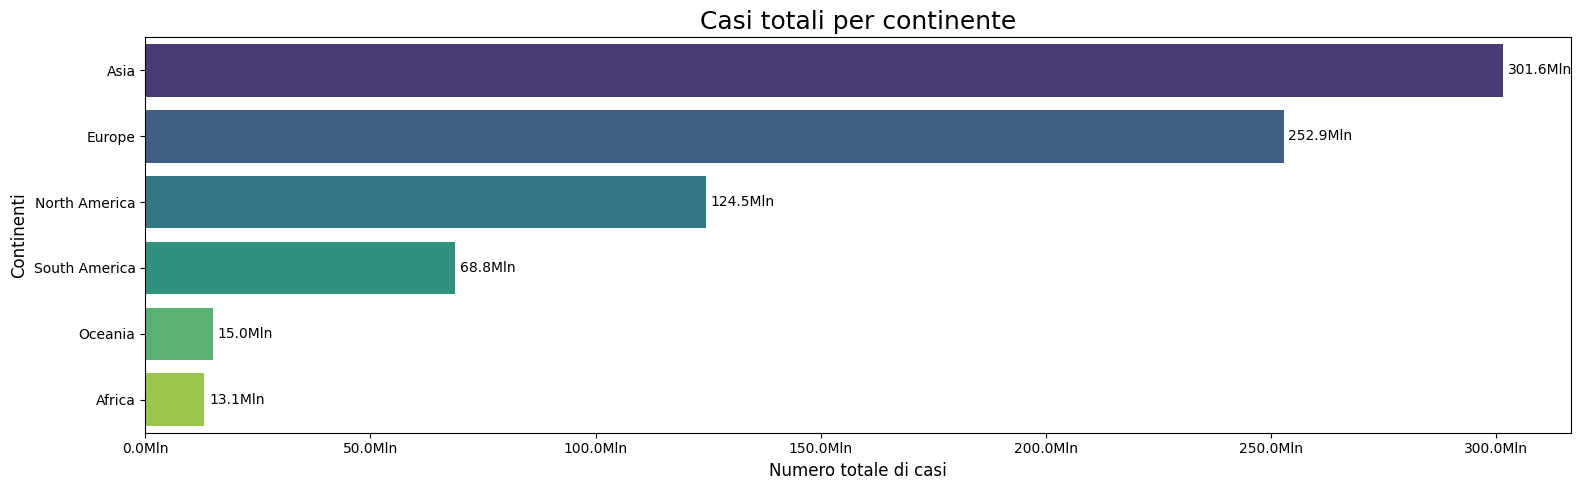

In [78]:
#Eseguo il conteggio sommando i nuovi casi raggruppati per continente
conteggio_casi = df_covid.groupby('continent')['new_cases'].sum().sort_values(ascending=False)
print(conteggio_casi)

# barplot
import matplotlib.ticker as mticker
plt.figure(figsize=(16, 5))
ax = sns.barplot(x=conteggio_casi.values,
                 y=conteggio_casi.index,
                 palette='viridis',
                 orient="h",
                 hue=conteggio_casi.index)
plt.title('Casi totali per continente', fontsize=18)
plt.xlabel('Numero totale di casi', fontsize=12)
plt.ylabel('Continenti', fontsize=12)
plt.title('Casi totali per continente', fontsize=18)

# Formatto l'asse x in milioni (es: 252.9M)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}Mln'))

# Aggiunta etichette sulle barre (in milioni)
for i, v in enumerate(conteggio_casi.values):
    ax.text(
        v + 1e6,  # piccolo spostamento a destra
        i,
        f'{v/1e6:.1f}Mln',
        va='center',
        ha='left',
        fontsize=10,

    )

plt.tight_layout()

plt.show()

In [79]:
#Percentuale rispetto al totale mondiale del numero dei casi
conteggio_casi_perc = conteggio_casi / conteggio_casi.sum() * 100
print(conteggio_casi_perc)

continent
Asia             38.864616
Europe           32.595108
North America    16.044216
South America     8.868141
Oceania           1.933598
Africa            1.694321
Name: new_cases, dtype: float64


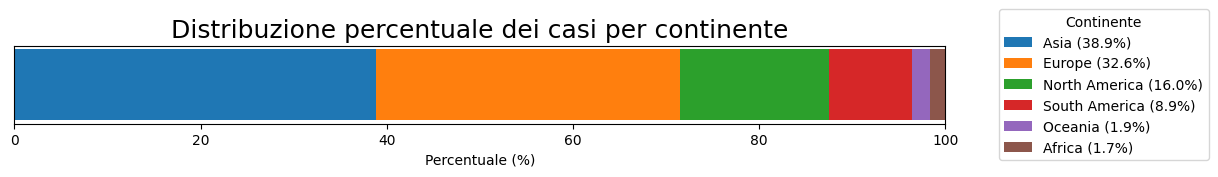

In [80]:
import matplotlib.pyplot as plt

#Creo un grafico a barre impilate per visualizzare le proporzioni percentuali
valori = conteggio_casi_perc.values
etichette = conteggio_casi_perc.index

plt.figure(figsize=(12, 1.5))
bottom = 0
for i, (val, label) in enumerate(zip(valori, etichette)):
    plt.barh(0, val, left=bottom, label=f"{label} ({val:.1f}%)")
    bottom += val

plt.xlabel('Percentuale (%)')
plt.xlim(0, 100)
plt.yticks([])
plt.title('Distribuzione percentuale dei casi per continente', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Continente")
plt.tight_layout( pad=0.05)
plt.show()


## 3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:


*  a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
*  b. il numero di nuovi casi rispetto alla data



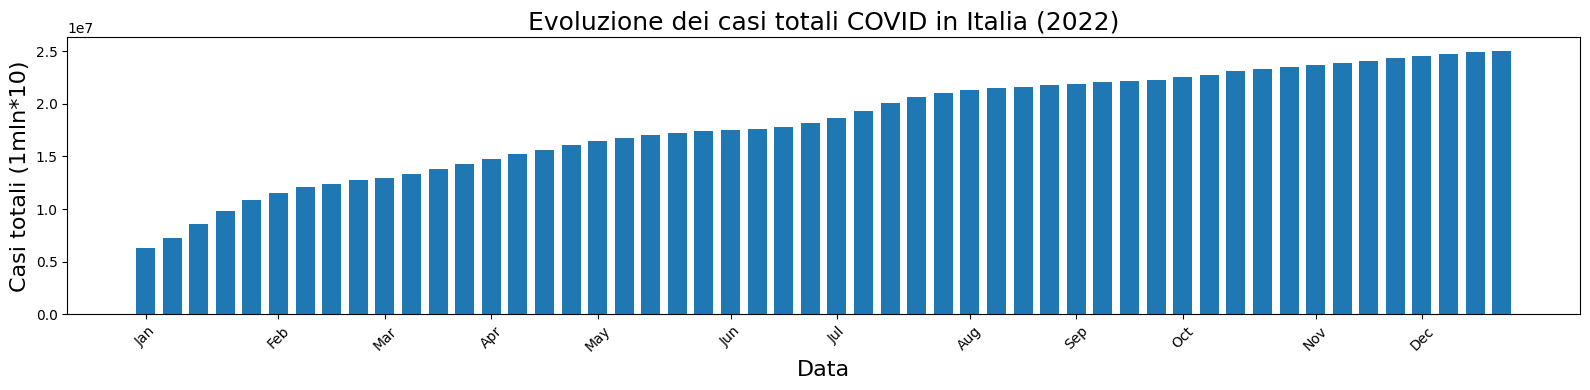

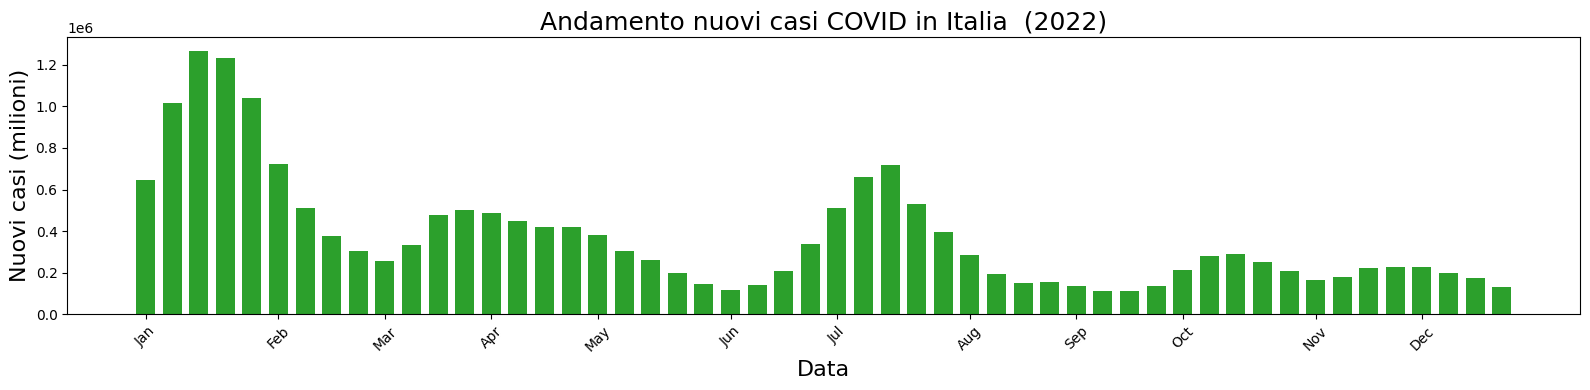

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

#Seleziono solo i dati per l'Italia
df_ita = df_covid[df_covid['location'] == 'Italy']

#Filtro solo il 2022
df_ita_2022 = df_ita[df_ita['date'].dt.year == 2022]

#Elimino i giorni senza misurazione (solo dove ci sono dati sui nuovi casi)
df_ita_2022 = df_ita_2022[df_ita_2022['new_cases'].notnull() & (df_ita_2022['new_cases'] > 0)]


# a.Evoluzione dei casi totali
plt.figure(figsize=(16, 4))
plt.bar(df_ita_2022['date'], df_ita_2022['total_cases'], color='tab:blue', width=5)
plt.title('Evoluzione dei casi totali COVID in Italia (2022)', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Casi totali (1mln*10)', fontsize=16)

#Per visualizzare le etichette con in nomi dei mesi vanno aggiunte le seguenti colonne:
df_ita_2022['month'] = df_ita_2022['date'].dt.month
df_ita_2022['month_name'] = df_ita_2022['date'].dt.strftime('%b')  # 'Jan', 'Feb', ecc.

# Risulta poi necessario trovare le date corrispondenti all'inizio di ogni mese
month_start_dates = df_ita_2022.groupby(df_ita_2022['date'].dt.to_period('M'))['date'].min()

#Modifica delle etichette sull'asse x
plt.xticks(ticks=month_start_dates, labels=df_ita_2022['month_name'].unique(), rotation=45)
plt.tight_layout()
plt.show()


# b.Numero di nuovi casi per data
plt.figure(figsize=(16, 4))
plt.bar(df_ita_2022['date'], df_ita_2022['new_cases'], width=5,color="tab:green")
plt.title('Andamento nuovi casi COVID in Italia  (2022)', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Nuovi casi (milioni)',fontsize=16)
plt.xticks(ticks=month_start_dates, labels=df_ita_2022['month_name'].unique(), rotation=45)
plt.tight_layout()
plt.show()


## 4. Riguardo le nazioni di Italia, Germania e Francia:

*  a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

*  b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante




Text(0, 0.5, 'Pazienti in terapia intensiva')

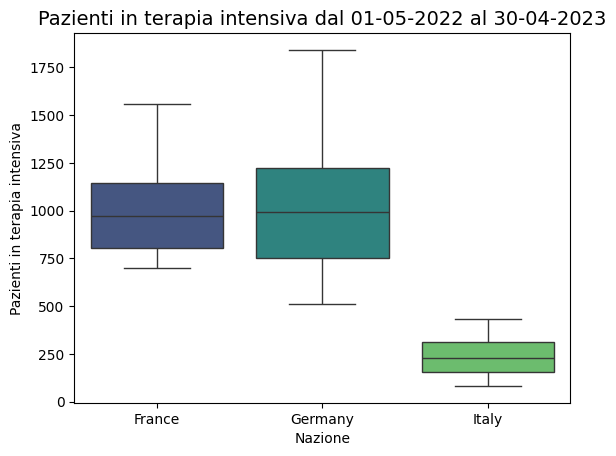

In [82]:
#a. Boxplot per confronto numero di pazienti tra Francia, Italia, Germania

df_ita_ger_fra = df_covid[(df_covid['location'] == 'Italy') | (df_covid['location'] == 'Germany') | (df_covid['location'] == 'France')]
date_icu = df_ita_ger_fra[(df_ita_ger_fra['date'] >= '2022-05-01') & (df_ita_ger_fra['date'] <= '2023-04-30')]
df_ita_ger_fra_icu = date_icu[['location', 'date', 'icu_patients']]
sns.boxplot(x=df_ita_ger_fra_icu["location"],
            y=df_ita_ger_fra_icu["icu_patients"],
            palette="viridis",
            hue=df_ita_ger_fra_icu["location"])
plt.title("Pazienti in terapia intensiva dal 01-05-2022 al 30-04-2023", fontsize=14)
plt.xlabel("Nazione")
plt.ylabel("Pazienti in terapia intensiva")


In [83]:
#b. Commento sul risultato:

'''Mentre Francia e Germania hanno avuto un numero di pazienti in terapia intensiva molto simile,
l'Italia appare distaccarsi da questo trend, avendo un numero decisamente inferiore.

Resta però da capire se ciò può essere dovuto a qualche causa o evento specifici che hanno prodotto questo risultato nel periodo analizzato.
Si faranno alcune analisi per valutare delle ipotesi per spiegare questo evento.

'''

"Mentre Francia e Germania hanno avuto un numero di pazienti in terapia intensiva molto simile,\nl'Italia appare distaccarsi da questo trend, avendo un numero decisamente inferiore.\n\nResta però da capire se ciò può essere dovuto a qualche causa o evento specifici che hanno prodotto questo risultato nel periodo analizzato.\nSi faranno alcune analisi per valutare delle ipotesi per spiegare questo evento.\n\n"

,date,people_fully_vaccinated
location,,
France,2022-05-01,52852013.0
Germany,2022-05-01,63258946.0
Italy,2022-05-01,47856499.0



Il numero totale per ciascuna nazione sembra comparabile, nonostante una numero più alto di vaccinati in Germania. Ciò non sembra supportare l'ipotesi.



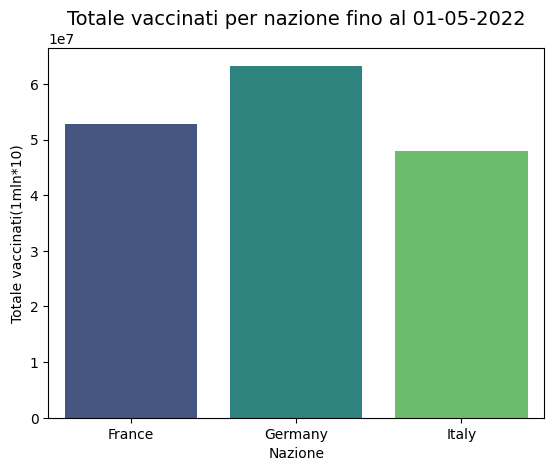

In [84]:
'''Ipotesi 1: Il numero totale di vaccinati ha inciso sui numeri ICU?'''

df_date_vac = df_ita_ger_fra.loc[df_covid['date'] <= '2022-05-01'].copy()
df_ita_ger_fra_spa_vac = df_date_vac[['location', 'date', 'people_fully_vaccinated']]

df_ita_ger_fra_spa_vac = df_ita_ger_fra_spa_vac.groupby('location').max()
display(df_ita_ger_fra_spa_vac)

#Barplot
sns.barplot(x=df_ita_ger_fra_spa_vac.index,
            y=df_ita_ger_fra_spa_vac['people_fully_vaccinated'],
            palette="viridis",
            hue=df_ita_ger_fra_spa_vac.index)
plt.title("Totale vaccinati per nazione fino al 01-05-2022", fontsize=14)
plt.xlabel("Nazione")
plt.ylabel("Totale vaccinati(1mln*10)")

print('''\nIl numero totale per ciascuna nazione sembra comparabile, nonostante una numero più alto di vaccinati in Germania. Ciò non sembra supportare l'ipotesi.\n''')


Anche indagando il rapporto ICU/vaccinati non sembra emergere una spiegazione sulla bassa numerosità in Italia di ICU nel periodo di riferimento



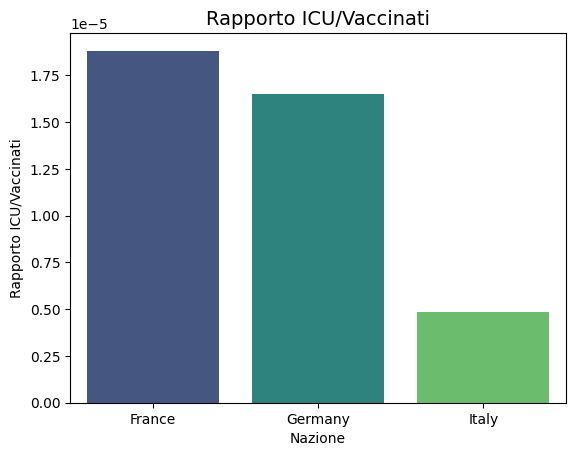

In [85]:
'''Rapporto pazienti ICU e numerosità dei vaccinati.'''

rapporto_icu_vac = df_ita_ger_fra_icu['icu_patients']/date_icu['people_fully_vaccinated']
rapporto_icu_vac.groupby(date_icu['location']).mean()

#Barplot
sns.barplot(x = rapporto_icu_vac.groupby(date_icu['location']).mean().index,
            y = rapporto_icu_vac.groupby(date_icu['location']).mean().values,
            palette="viridis",
            hue=rapporto_icu_vac.groupby(date_icu['location']).mean().index)
plt.title("Rapporto ICU/Vaccinati", fontsize=14)
plt.xlabel("Nazione")
plt.ylabel("Rapporto ICU/Vaccinati")

print('''\nAnche indagando il rapporto ICU/vaccinati non sembra emergere una spiegazione sulla bassa numerosità in Italia di ICU nel periodo di riferimento\n''')


ICU Admission Rate
 location
France     0.057915
Germany         NaN
Italy      0.038233
dtype: float64

ICU Utilization Rate
 location
France     0.000015
Germany    0.000012
Italy      0.000004
dtype: float64

Death to ICU
 location
France     0.006388
Germany    0.006507
Italy      0.001311
dtype: float64

Stringency to ICU
 location
France     0.013856
Germany    0.012475
Italy      0.074097
dtype: float64

Dall’analisi emergono tre evidenze principali:
1) Francia e Germania hanno gestito un carico ICU più elevato, con maggiore accesso ai trattamenti intensivi
2) l’Italia, pur con minor carico ICU e ospedaliero, ha registrato un tasso decessi/ICU più alto, che potrebbe riflettere saturazione o altri fattori di rischio
3) l’approccio italiano è stato il più restrittivo in proporzione ai ricoveri intensivi, suggerendo una strategia maggiormente orientata alla prevenzione anticipata
L’assenza del dato tedesco sull’ICU admission rate limita una piena interpretazione del quadro clinico

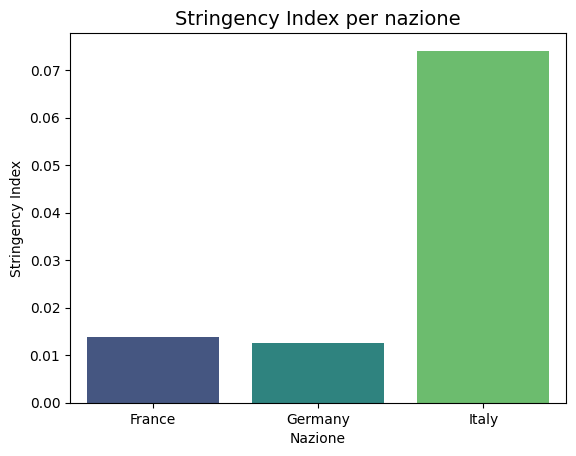

In [86]:
'''1. ICU Admission Rate: è possibile che in Italia ci sia stata maggiore prevenzione delle terapie intesive durante i ricoveri ordinari?
2. ICU Utilization Rate: può il risultato essere dovuto a una distorsione dovuta alla diversa numerosità di abitanti per ciascun paese?
3. Death to ICU: il risultato potrebbe dipendere dal basso numero di posti disponibili in icu? Un maggior numero di morti al di fuori delle icu potrebbe dare un indicazione.
4. Stringency to ICU: può la severità delle misure restrittive messe in atto influenzare il numero di ricoveri icu?'''

icu_admission_rate = date_icu['icu_patients'] / date_icu['hosp_patients'] #ICU Admission Rate

icu_utilization_rate = date_icu['icu_patients'] / date_icu['population'] #ICU Utilization Rate

death_to_icu = date_icu['icu_patients'] / date_icu['total_deaths'] #Death to ICU

stringency_to_icu = date_icu['stringency_index'] / date_icu['icu_patients'] #Stringency to ICU

print("\nICU Admission Rate\n", icu_admission_rate.groupby(date_icu['location']).mean())
print("\nICU Utilization Rate\n", icu_utilization_rate.groupby(date_icu['location']).mean())
print("\nDeath to ICU\n", death_to_icu.groupby(date_icu['location']).mean())
print("\nStringency to ICU\n", stringency_to_icu.groupby(date_icu['location']).mean())

#Barplot
sns.barplot(x = stringency_to_icu.groupby(date_icu['location']).mean().index,
            y = stringency_to_icu.groupby(date_icu['location']).mean().values,
            palette="viridis", hue=stringency_to_icu.groupby(date_icu['location']).mean().index)
plt.title("Stringency Index per nazione", fontsize=14)
plt.xlabel("Nazione")
plt.ylabel("Stringency Index")

#Commento
print('''\nDall’analisi emergono tre evidenze principali:
1) Francia e Germania hanno gestito un carico ICU più elevato, con maggiore accesso ai trattamenti intensivi
2) l’Italia, pur con minor carico ICU e ospedaliero, ha registrato un tasso decessi/ICU più alto, che potrebbe riflettere saturazione o altri fattori di rischio
3) l’approccio italiano è stato il più restrittivo in proporzione ai ricoveri intensivi, suggerendo una strategia maggiormente orientata alla prevenzione anticipata
L’assenza del dato tedesco sull’ICU admission rate limita una piena interpretazione del quadro clinico.

Importante notare dal grafico l'ampiezza maggiore dello stringency index in Italia rispetto ai valori di Francia e Germania.\n''')


## 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:


* a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)
* b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno



          hosp_patients
location               
France        6008717.0
Germany             0.0
Italy         4419950.0
Spain         2411706.0

Verifica dati nulli nella colonna 'hosp_patients' per le nazioni selezionate nel 2021:
365

I dati nulli risultanti riguardano la totalità delle osservazioni in Germania per il 2021.
In questo caso non è posibile effettuare sostituzioni, data la totale assenza di misurazioni.
Si ritiene dunque necessario eliminare la Germania da questa analisi,
almeno sino a quando il dato non potrà essere recuperato da ulteriori fonti esterne (recuperabile da hosp_admissions).



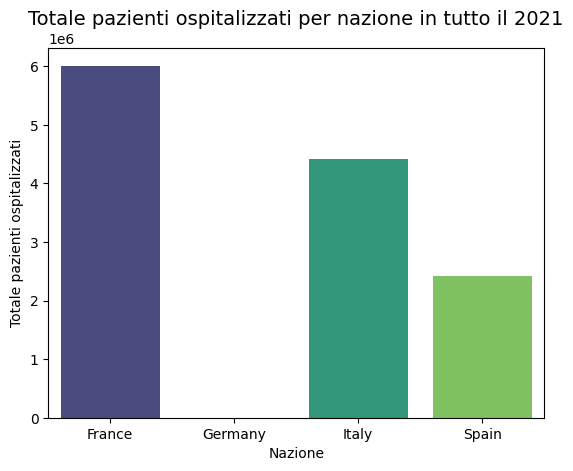

In [87]:
#Filtro le nazioni desiderate
df_ita_ger_fra_spa = df_covid[(df_covid['location'] == 'Italy') | (df_covid['location'] == 'Germany') | (df_covid['location'] == 'France') | (df_covid['location'] == 'Spain')]

#Filtro per l'anno 2021 sulla colonna 'date'
df_ita_ger_fra_spa_2021 = df_ita_ger_fra_spa[df_ita_ger_fra_spa['date'].dt.year == 2021]

#Seleziono e raggruppo le colonne
df_ita_ger_fra_spa_hosp = df_ita_ger_fra_spa_2021[['location', 'hosp_patients']]
df_ita_ger_fra_spa_hosp = df_ita_ger_fra_spa_hosp.groupby('location').sum()

#Risultati e Barplot
print(df_ita_ger_fra_spa_hosp)
sns.barplot(x=df_ita_ger_fra_spa_hosp.index, y=df_ita_ger_fra_spa_hosp['hosp_patients'], palette="viridis", hue=df_ita_ger_fra_spa_hosp.index)
plt.title("Totale pazienti ospitalizzati per nazione in tutto il 2021", fontsize=14)
plt.xlabel("Nazione")
plt.ylabel("Totale pazienti ospitalizzati")

#Verifica dati nulli
print("\nVerifica dati nulli nella colonna 'hosp_patients' per le nazioni selezionate nel 2021:")
print(df_ita_ger_fra_spa_2021.isnull().sum()['hosp_patients'])

# Commento sulla gestione dei dati nulli
print("""
I dati nulli risultanti riguardano la totalità delle osservazioni in Germania per il 2021.
In questo caso non è posibile effettuare sostituzioni, data la totale assenza di misurazioni.
Si ritiene dunque necessario eliminare la Germania da questa analisi,
almeno sino a quando il dato non potrà essere recuperato da ulteriori fonti esterne (recuperabile da hosp_admissions).
""")


Text(0, 0.5, 'Totale pazienti ospitalizzati(Mln)')

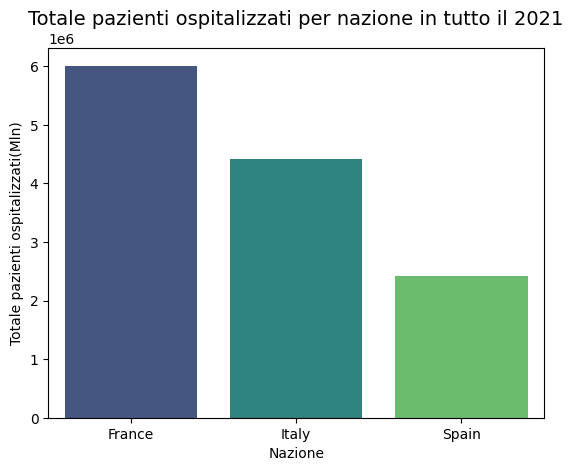

In [88]:
#Barplot con Germania esclusa
df_ita_fra_spa_2021 = df_ita_ger_fra_spa_2021.drop(df_ita_ger_fra_spa_2021[df_ita_ger_fra_spa_2021['location'] == 'Germany'].index)
df_ita_fra_spa_2021_hosp = df_ita_fra_spa_2021[['location', 'hosp_patients']]
df_ita_fra_spa_2021_hosp = df_ita_fra_spa_2021_hosp.groupby('location').sum()

sns.barplot(x=df_ita_fra_spa_2021_hosp.index, y=df_ita_fra_spa_2021_hosp['hosp_patients'], palette="viridis", hue=df_ita_fra_spa_2021_hosp.index)
plt.title("Totale pazienti ospitalizzati per nazione in tutto il 2021", fontsize=14)
plt.xlabel("Nazione")
plt.ylabel("Totale pazienti ospitalizzati(Mln)")


          weekly_hosp_admissions
location                        
France                 2262365.0
Germany                1826264.0
Italy                  1652358.0
Spain                  2068304.0

Verifica dati nulli nella colonna 'hosp_patients' per le nazioni selezionate nel 2021:
0


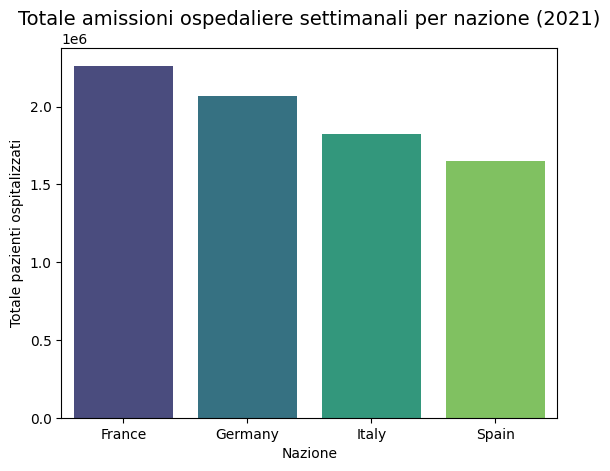

In [89]:
'''Utilizzando le ammissioni ospedaliere per settimana (weekly_hosp_admissions), dove per la Germania sono presenti i conteggi,
si può avere una stima delle proporzioni del numero di ospedalizzazioni totali del 2021 per ciascuna nazione richiesta'''

#Seleziono e raggruppo le colonne
df_ita_ger_fra_spa_adm= df_ita_ger_fra_spa_2021[['location', 'weekly_hosp_admissions']]
df_ita_ger_fra_spa_adm = df_ita_ger_fra_spa_adm.groupby('location').sum()

#Risultati e Barplot
print(df_ita_ger_fra_spa_adm)
sns.barplot(x=df_ita_ger_fra_spa_adm.index, y=df_ita_ger_fra_spa_adm['weekly_hosp_admissions'].sort_values(ascending=False), palette="viridis", hue=df_ita_ger_fra_spa_adm.index)
plt.title("Totale amissioni ospedaliere settimanali per nazione (2021)", fontsize=14)
plt.xlabel("Nazione")
plt.ylabel("Totale pazienti ospitalizzati")

#Verifica dati nulli
print("\nVerifica dati nulli nella colonna 'hosp_patients' per le nazioni selezionate nel 2021:")
print(df_ita_ger_fra_spa_2021.isnull().sum()['weekly_hosp_admissions'])